# Thermodynamic Limit
### Authors: Lorenzo Braccini, Prof. Bart Hoogenboom, University College London

<font color=red>Note: the red texts are meant as side notes during the implementation.

</font> 

### Running instructions

The notebook runs from top to bottom and you should ``Run`` each input cell one after the other. 

## Introduction:

## Content of the notebook:
1. [Section 1](#1) **Rolls of dies**

In [1]:
%%capture
# IMPORTANT - run this cell to ensure videos work
!conda install -y -q ffmpeg 
!conda install jupyter_contrib_nbextensions # I am not sure if this is correct

In [2]:
# Imports

import numpy as np # advanced maths 
import matplotlib.pyplot as plt # plots 
from mpl_toolkits.mplot3d import Axes3D # 3D plots
import matplotlib.animation as animation # animation (video)
import matplotlib.gridspec as gridspec # fancy subplots
from IPython.display import HTML # shows animation in jupyter
from ipywidgets import interact, interactive, fixed, interact_manual # add interactions
from tqdm import tqdm_notebook as tqdm

In [3]:
matplotlib inline

If "save = True", the notebook outputs are saved. Note: In this case, the running time increases. 

If "gif = True", the file are saved as gif. Otherwise as mp4

In [4]:
save = False # if true, it saves.
gif = False # if true, it saves as gif. Otherwise, it saves as mp4.

## 1) <a id='1'> </a> Rolls of dies

Let us roll 1, 2, 3, and 4 dies and plot the probability of sum of the outcomes. The outcome of the rolls are reported in red and the probabilty in blue.

In [5]:
def roll(n):
    """
    Rolls n dies
    Inputs:
    n      Number of dies
    Output: Sum of the dies outcome
    """
    return np.sum(np.random.randint(1, 7, n))

In [6]:
%%capture
Nframes = 100
N = 4 # maximum number of dies
fig1, ax = plt.subplots(1,4, figsize = (13,8))
outcome = np.zeros((N,6*N))
xs = np.arange(0, 6*N, 1)

def dies_roll(frame):
    # iterate over each subplot
    for n in range(1, N+1):
        val = roll(n) # roll the die(s) 
        outcome[n - 1,val] += 1 # salve the outcome 
        
        ax[n -1].clear() # clear the frame
        
        # plot the bars
        ax[n -1].bar(xs, outcome[n -1]/(frame+1), width = 1, edgecolor='k', facecolor = 'b', zorder=2, alpha = 0.8)
        ax[n -1].get_children()
        ax[n -1].get_children()[val].set_facecolor('r') 
    
        # additional plot feature
        ax[n-1].set_xlim(0.5, 6*n + 0.5)
        ax[n-1].set_ylim(0, 1)
        ax[n-1].set_xticks(np.arange(0,(6+1)*n,n))
        if n == 1:
            ax[n-1].set_title('1 die')
            ax[n-1].set_ylabel('Probabiliy')
        else:
            ax[n-1].set_title('{} dies'.format(n))
        

In [7]:
# create the animation
ani1 = animation.FuncAnimation(fig1, dies_roll, init_func=None, interval=200, frames = tqdm(range(Nframes)))
HTML(ani1.to_html5_video())

In [8]:
N_rolls = 1000    # number of rolls
N_max = 20        # maximum number of dies 

@interact(n=(1,N_max, 1)) # interacting velocity 
def dies(n):
    
    outcomes = np.random.randint(1, 7, (N_rolls, n)) # roll N_rolls the dies
    distribution = np.sum(outcomes, axis = 1) # sum the outcomes
    
    xs = np.arange(0,n*6+1,1)
    ys = np.zeros(np.size(xs))
    for i in range(n*6+1):
        ys[i] = np.sum(np.where(distribution == i, 1, 0))
    ys /= N_rolls
    
    fig2 = plt.figure(figsize = (12,8))
    ax = fig2.add_subplot(111)
    
    ax.bar(xs, ys, width = 1, edgecolor='k', facecolor = 'b', zorder=0, alpha = 0.8, label='Distribution')

    # additional plot feature
    ax.set_xlim(0.5, 6*n + 0.5)
    ax.set_ylim(0, 0.2)
    ax.set_xticks(np.arange(0,(6+1)*n,n))
    
    # calulate and plot the average and standard deviation of the distribution
    st_dev = np.std(distribution)
    mean = np.mean(distribution)
    ax.axvline(x=mean, color='r', label='Average', zorder=2)
    ax.bar(mean, 1, width = st_dev*2, edgecolor='k', facecolor = 'g', zorder=0, alpha = 0.3, label='Standard Deviation')
    
    ax.set_xlabel('Sum of the dies')
    ax.set_ylabel('Probability')
    ax.set_title('Probability distribution of the sum of the outcomes of n dies')
    ax.legend(loc='upper left')


interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

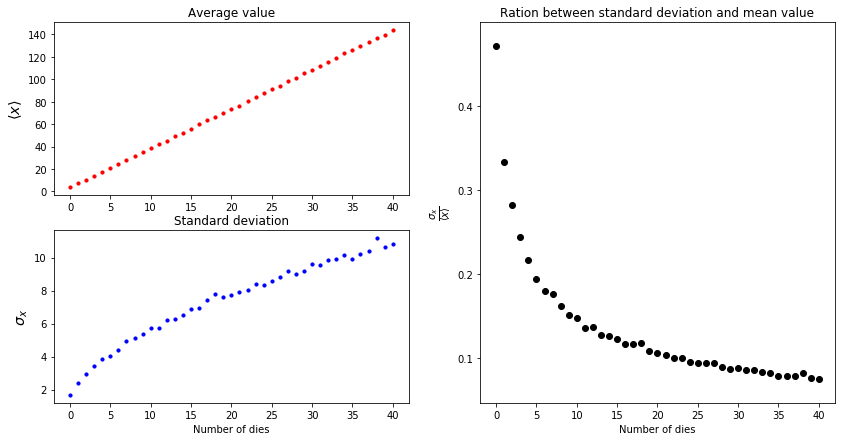

In [9]:
N_max = 40        # maximum number of dies 
ns = np.arange(0,N_max+1,1)
means = np.zeros(np.size(ns))
st_devs = np.zeros(np.size(ns))
fig3 = plt.figure(figsize = (14,7))
grid = fig3.add_gridspec(2,2)

for i in range(0, N_max+1):
    n = i+1
    distribution = np.sum(np.random.randint(1, 7, (N_rolls, n)), axis = 1)
    means[i] = np.mean(distribution)
    st_devs[i] = np.std(distribution)

# mean plot
ax1 = fig3.add_subplot(grid[0,0])
ax1.scatter(ns, means, color = 'r', s = 10)
ax1.set_title('Average value')
ax1.set_ylabel(r'$\left<x\right>$', fontsize = 'x-large')

# standard deviation plot
ax2 = fig3.add_subplot(grid[1,0])
ax2.scatter(ns, st_devs, color = 'b', s = 10)
ax2.set_title('Standard deviation')
ax2.set_xlabel('Number of dies')
ax2.set_ylabel(r'$\sigma_x$',fontsize = 'x-large')

# ratio standard deviation - mean plot
ax3 = fig3.add_subplot(grid[:,1])
ax3.scatter(ns, st_devs/means, color = 'k')
ax3.set_title('Ration between standard deviation and mean value')
ax3.set_xlabel('Number of dies')
ax3.set_ylabel(r'$\frac{\sigma_x}{\left<x\right>}$', fontsize = 'x-large');